In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/sukhen/Desktop/CSV_files/Zomatodataset/zomato.csv',skipinitialspace=True)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Getting the dimensions of the data 
df.shape

(9551, 21)

In [4]:
# List of column names
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
# Getting the datatypes
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [6]:
# Getting a brief description of all numerical variables
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
#checking if any null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df.Cuisines.isnull().value_counts()

False    9542
True        9
Name: Cuisines, dtype: int64

In [9]:
# importing country_code excel 
df_country = pd.read_excel('/Users/sukhen/Desktop/CSV_files/Zomatodataset/Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [10]:
# Merging df and df_country together

df_final = pd.merge(df,df_country ,how = "left",on = "Country Code")
df_final.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [11]:
# Getting unique counts per country

df_final.Country.value_counts()

India             8652
United States      434
United Kingdom      80
UAE                 60
South Africa        60
Brazil              60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [12]:
#Getting orders by City 

df_final.City.value_counts()

New Delhi      5473
Gurgaon        1118
Noida          1080
Faridabad       251
Ghaziabad        25
               ... 
Mc Millan         1
Beechworth        1
Clatskanie        1
Montville         1
Paynesville       1
Name: City, Length: 141, dtype: int64

In [13]:
# determining which citites zomato caters 
df_final.City.unique()   

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras�_lia', 'Rio de Janeiro', 'S��o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

In [14]:
# determining the count of cities catered by zomato
df_final.City.nunique()

141

In [15]:
# determining orders by city
df_final.City.value_counts()

New Delhi      5473
Gurgaon        1118
Noida          1080
Faridabad       251
Ghaziabad        25
               ... 
Mc Millan         1
Beechworth        1
Clatskanie        1
Montville         1
Paynesville       1
Name: City, Length: 141, dtype: int64

In [16]:
# determining the average price 

df_final['Price range'].mean()

1.804837189823055

In [17]:
# Converting all Yes/No Values in binary

varlist = ['Has Table booking','Has Online delivery','Is delivering now','Switch to order menu']

def binary(x):
    return x.map({'Yes':1,'No':0})

#Applying function to our df_final dataset

df_final[varlist] = df_final[varlist].apply(binary)
df_final.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,1,0,0,0,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,1,0,0,0,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,1,0,0,0,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,0,0,0,0,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,1,0,0,0,4,4.8,Dark Green,Excellent,229,Phillipines


In [18]:
# Determining different kind of cuisines ordered

df_final['Cuisines'].astype('str')


0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

<AxesSubplot:xlabel='Has Online delivery', ylabel='Country'>

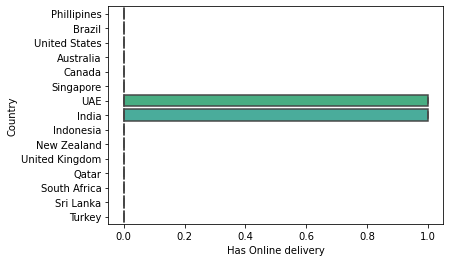

In [19]:
# Plotting barchart for has online delivery wrt country:

sns.boxplot(df_final['Has Online delivery'],df_final['Country'])

<AxesSubplot:xlabel='Has Table booking', ylabel='Country'>

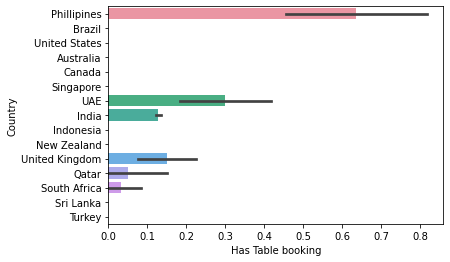

In [20]:
# Plotting barchart for has table booking wrt country:

sns.barplot(df_final['Has Table booking'],df_final['Country'])

<AxesSubplot:xlabel='Aggregate rating', ylabel='count'>

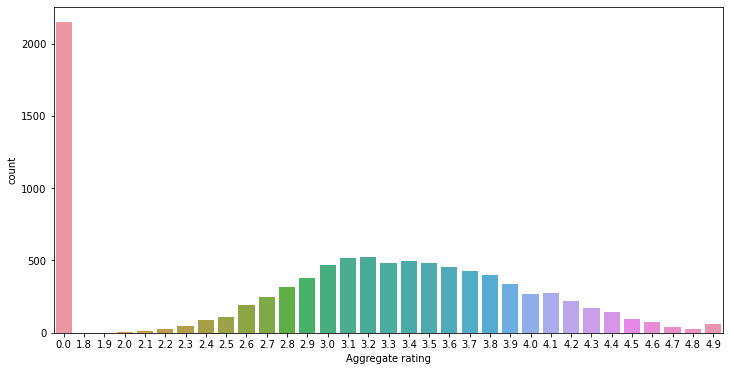

In [21]:
# Plot Aggregate rating 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.countplot(df_final['Aggregate rating'])

### Observations:
1. Not rated observations are very high
2.Aggregate ratings are increasing from 2.4 to 3.2 

<AxesSubplot:>

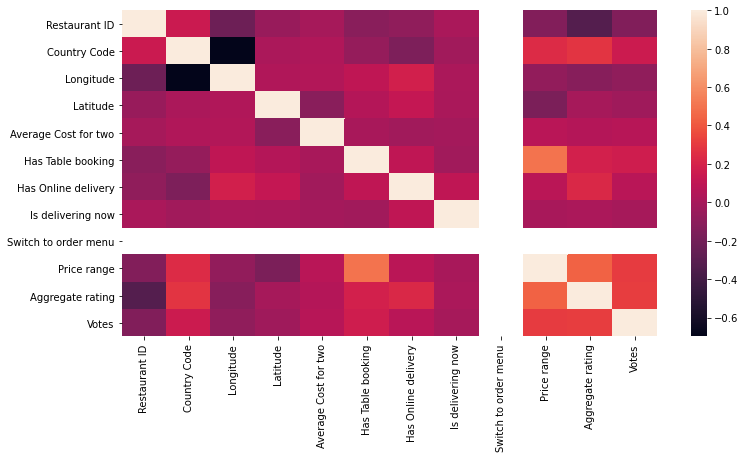

In [22]:
# Correlation matrix

sns.heatmap(df_final.corr())

([<matplotlib.patches.Wedge at 0x7fb95005b460>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.030157837943120734, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.016449729787156763, '0.87%')])

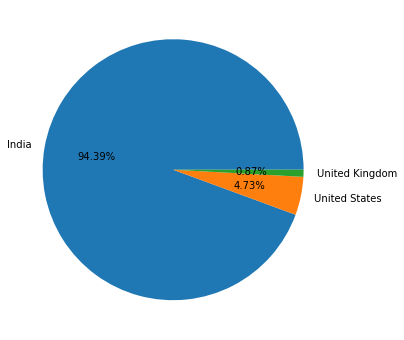

In [23]:
# Plotting Top 3 countries ordering on Zomato

df_countries = df_final.Country.value_counts().index
df_countries
df_values = df_final.Country.value_counts()
df_values
plt.pie(df_values[:3],labels = df_countries[:3],autopct = '%1.2f%%')

In [24]:
# Creating a column of Rating count grouping  Aggregate rating Rating color Rating text
ratings = df_final.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


### Observations :
1. When the Aggregate rating is 4.5 to 4.9 --> Excellent
2. When the Aggregate rating is 4.0 to 4.4 --> Very Good
3. When the Aggregate rating is 3.5 to 3.9 --> Good
4. When the Aggregate rating is 2.5 to 3.4 --> Average
5. When the Agregate rating is 1.8 to 2.4 --> Poor

<AxesSubplot:xlabel='Rating text', ylabel='count'>

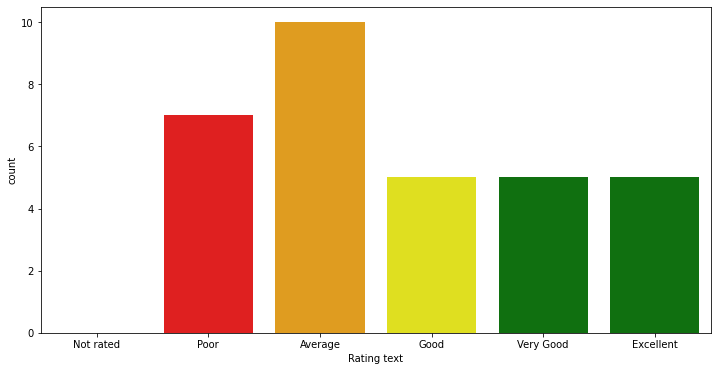

In [25]:
# Plot wrt to rating text
sns.countplot(x = 'Rating text',data = ratings,palette = ['white','red','orange','yellow','green','green'])

In [26]:
# Find the countries that have not rated or given zero rating
df_final[df_final['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns = {0 : 'Not Rated'})

,Country,Not Rated
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [27]:
# Find the countries that have given excellent rating

excellent_rating = df_final[df_final['Rating color']=='Dark Green'].groupby('Country').size().reset_index().rename(columns = {0 : 'Excellent Rating'}).sort_values(by = 'Excellent Rating',ascending = False)
excellent_rating

,Country,Excellent Rating
2,India,116
12,United States,68
11,United Kingdom,23
10,UAE,18
1,Brazil,16
4,New Zealand,12
5,Phillipines,12
7,South Africa,12
9,Turkey,10
3,Indonesia,7


In [28]:
# finding out which currency is used by which country
df_final[['Country','Currency']].groupby(['Country','Currency']).size()

Country         Currency              
Australia       Dollar($)                   24
Brazil          Brazilian Real(R$)          60
Canada          Dollar($)                    4
India           Indian Rupees(Rs.)        8652
Indonesia       Indonesian Rupiah(IDR)      21
New Zealand     NewZealand($)               40
Phillipines     Botswana Pula(P)            22
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
South Africa    Rand(R)                     60
Sri Lanka       Sri Lankan Rupee(LKR)       20
Turkey          Turkish Lira(TL)            34
UAE             Emirati Diram(AED)          60
United Kingdom  Pounds(��)                  80
United States   Dollar($)                  434
dtype: int64

In [29]:
# finding out which city is ordering most from which country
Country_City = df_final[['Country','City']].groupby(['Country','City']).size()
Country_City

Country        City          
Australia      Armidale           1
               Balingup           1
               Beechworth         1
               Dicky Beach        1
               East Ballina       1
                                 ..
United States  Valdosta          20
               Vernonia           1
               Waterloo          20
               Weirton            1
               Winchester Bay     1
Length: 141, dtype: int64

In [30]:
# finding out the orders given by Indian Cities
Indian_city = df_final[df_final['Country'] == 'India'].groupby('City').size()
Indian_city

City
Agra              20
Ahmedabad         21
Allahabad         20
Amritsar          21
Aurangabad        20
Bangalore         20
Bhopal            20
Bhubaneshwar      21
Chandigarh        18
Chennai           20
Coimbatore        20
Dehradun          20
Faridabad        251
Ghaziabad         25
Goa               20
Gurgaon         1118
Guwahati          21
Hyderabad         18
Indore            20
Jaipur            20
Kanpur            20
Kochi             20
Kolkata           20
Lucknow           21
Ludhiana          20
Mangalore         20
Mohali             1
Mumbai            20
Mysore            20
Nagpur            20
Nashik            20
New Delhi       5473
Noida           1080
Panchkula          1
Patna             20
Puducherry        20
Pune              20
Ranchi            20
Secunderabad       2
Surat             20
Vadodara          20
Varanasi          20
Vizag             20
dtype: int64

In [31]:
# finding out the different cuisines ordered by countries
Country_cuisine = df_final[['Country','Cuisines']].groupby(['Country','Cuisines']).size()
Country_cuisine.head(50)

Country    Cuisines                                    
Australia  Asian                                           1
           Australian                                      1
           Bar Food, Modern Australian                     1
           Bar Food, Steak                                 1
           Breakfast, Coffee and Tea                       2
           Breakfast, Coffee and Tea, Modern Australian    1
           Breakfast, Modern Australian                    1
           Burger, Coffee and Tea, Modern Australian       1
           Cafe                                            2
           Cafe, Australian                                1
           Cafe, Coffee and Tea, Modern Australian         1
           Cafe, Coffee and Tea, Sandwich                  1
           Coffee and Tea, Modern Australian               1
           Coffee and Tea, Tapas, Australian               1
           Coffee and Tea, Tea, Modern Australian          1
           Italian, Fusion, C

In [39]:
# find out which countries ordered 'Indian' cuisine
Indian_cuisine_ordered = df_final[df_final['Cuisines'] == 'Indian'].groupby('Country').size()
Indian_cuisine_ordered

Country
Brazil            1
Qatar             5
South Africa      1
UAE               5
United Kingdom    3
United States     3
dtype: int64